# 보검이는 뭐할까?

```
1:WALKING
2:WALKING_UPSTAIRS
3:WALKING_DOWNSTAIRS
4:SITTING 
5:STANDING
6:LAYING

In [5]:
feature_20 = ['tGravityAcc-min()-X',
 'fBodyAcc-mean()-X',
 'angle(Y,gravityMean)',
 'fBodyAccMag-energy()',
 'tGravityAcc-arCoeff()-Y,1',
 'tGravityAcc-arCoeff()-Z,1',
 'tBodyGyro-max()-X',
 'fBodyGyro-bandsEnergy()-1,8_1',
 'fBodyGyro-maxInds-X',
 'tBodyAcc-correlation()-X,Y',
 'tGravityAcc-max()-Y',
 'fBodyAccMag-std()',
 'tGravityAcc-arCoeff()-X,1',
 'tGravityAcc-max()-Z',
 'tGravityAcc-energy()-Y',
 'tBodyGyro-iqr()-X',
 'tBodyGyro-correlation()-Y,Z',
 'fBodyGyro-skewness()-X',
 'fBodyAcc-max()-X',
 'fBodyAcc-std()-Y']

AttributeError: 'list' object has no attribute 'values'

<bound method BaseEstimator.get_params of DecisionTreeClassifier(min_samples_split=3, random_state=43)>

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split   #데이터 셋 분리
from sklearn.metrics import accuracy_score  #분류 평가
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier 


# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

##########데이터 로드

df = pd.read_csv('./data/human_activity.csv')
labels={1:"WALKING",2:"WALKING_UPSTAIRS",
         3:"WALKING_DOWNSTAIRS",4:"SITTING",
         5:"STANDING",6:"LAYING" }
##########데이터 분석

##########데이터 전처리

x_data = df.drop(['action'], axis=1)
y_data = df['action']

x_data = x_data[feature_20]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=43, stratify=y_data)

##########모델 생성

model = DecisionTreeClassifier(random_state=43,min_samples_split=3)
# model = DecisionTreeClassifier(criterion='gini', max_depth=None, max_leaf_nodes=None, min_samples_split=2, min_samples_leaf=1, max_features=None)

##########모델 학습

model.fit(x_train, y_train)

##########모델 검증

print(f'훈련_Accuracy: {model.score(x_train, y_train)}') 
print(f'테스트_Accuracy: {model.score(x_test, y_test)}') 

#평가 리포트

y_predict = model.predict(x_test)
print(classification_report(y_test,y_predict,target_names=list(labels.values())))

##########모델 배포

# 메모리상의 정보를 파일로 만들자!!!!! 영구히 보존!!!
import joblib
joblib.dump(model, './model/dt_model.pkl')
joblib.dump(feature_20, './model/dt_model_feature20.pkl')


##########모델 예측
# 보검이는 뭐하고 있을까?에서 예측 진행




훈련_Accuracy: 0.9993064225273963
테스트_Accuracy: 0.9427184466019417
                    precision    recall  f1-score   support

           WALKING       0.93      0.97      0.95       517
  WALKING_UPSTAIRS       0.94      0.92      0.93       463
WALKING_DOWNSTAIRS       0.95      0.91      0.93       422
           SITTING       0.92      0.92      0.92       533
          STANDING       0.92      0.92      0.92       572
            LAYING       1.00      1.00      1.00       583

          accuracy                           0.94      3090
         macro avg       0.94      0.94      0.94      3090
      weighted avg       0.94      0.94      0.94      3090



['./model/dt_model_feature20.pkl']

```
피쳐 셀렉션 하기전의 성능보다 조금 올랐다. 
```

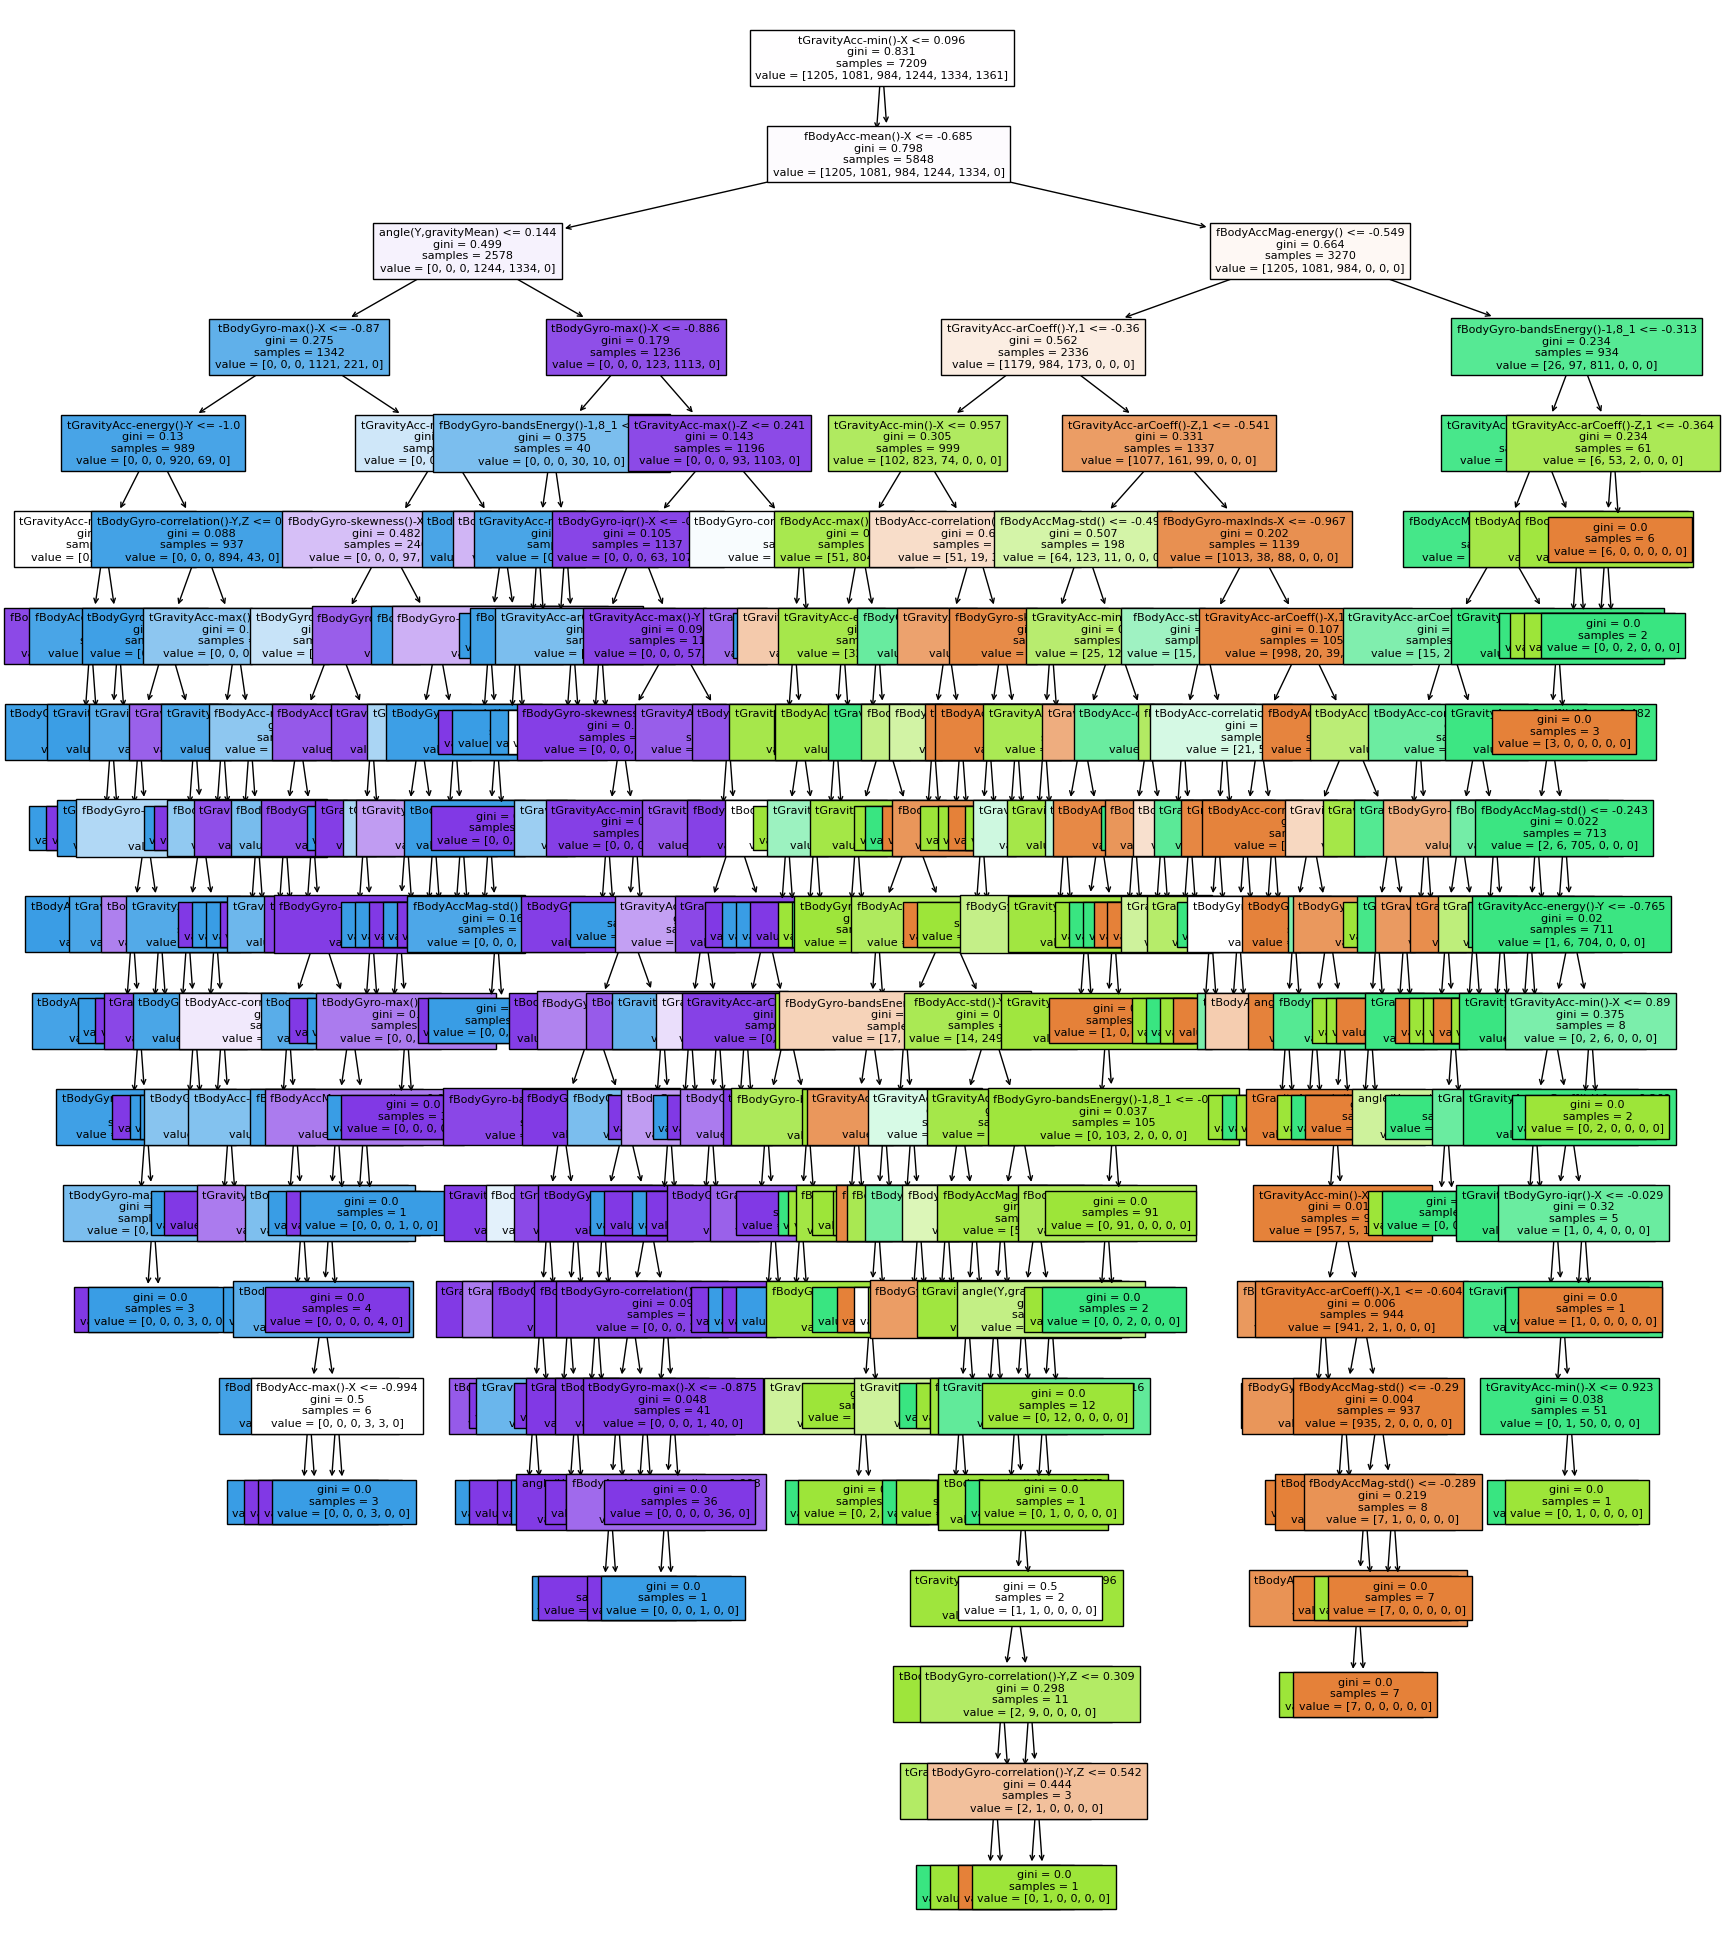

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,25))

plot_tree(model,filled=True, feature_names=x_data.columns.to_list(),fontsize=8)

plt.show()

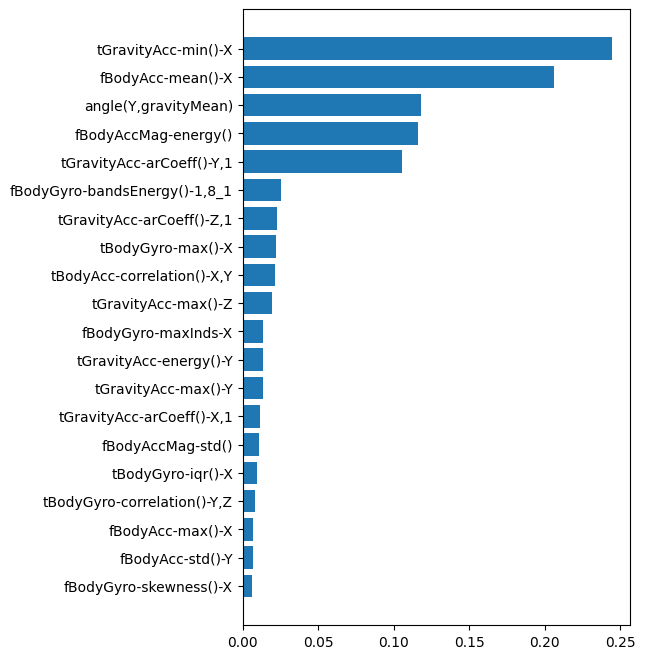

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# feature importance를 column 별로 시각화 하기 
rank = pd.Series(data=model.feature_importances_,index=x_data.columns).sort_values(ascending=False)

plt.figure(figsize=(5,8))
plt.barh(rank.index,rank.values)
plt.yticks(rank.index)
plt.gca().invert_yaxis() #좌표 뒤집기
plt.show()